# PyoT Demo

### Setup the environment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from networkx import *
from pyot.rplApp import *
from pyot.models import *
from IPython.display import Image, display
from networkx.algorithms import *
import numpy as np
import django
django.setup()

def pngShow(path):
    i = Image(filename=path)
    display(i)

### Toggle actuators on every node - Synchronous semantic

In [ ]:
actuators = Resource.objects.filter(uri='/actuators/toggle', host__active=True)

for i in range(2):
    print 'run', i
    for act in actuators:
        act.POST(query="mode=off")
        print 'toggling res: ' + str(act) 

    for act in actuators:
        act.POST(query="mode=on")
        print 'toggling res: ' + str(act) 
        
print 'Done'

### Toggle actuators on every node - Asynchronous semantic

In [ ]:
actuators = Resource.objects.filter(uri='/actuators/toggle', host__active=True)

for i in range(2):
    tasks = []
    for act in actuators:
        tasks.append(act.asyncPOST(query="mode=on"))
        print 'toggling res: ' + str(act) 
    for task in tasks:
        task.wait()
        print task.result
    print 'Done'

    tasks = []
    for act in actuators:
        tasks.append(act.asyncPOST(query="mode=off"))
        print 'toggling res: ' + str(act) 
    for task in tasks:
        task.wait()
        print task.result
    print 'Done' 

### Retrieve and display light values

[<Resource: aaaa::212:7402:2:202 - /sensors/light>, <Resource: aaaa::212:740a:a:a0a - /sensors/light>, <Resource: aaaa::212:740b:b:b0b - /sensors/light>, <Resource: aaaa::212:7408:8:808 - /sensors/light>, <Resource: aaaa::212:7406:6:606 - /sensors/light>, <Resource: aaaa::212:7409:9:909 - /sensors/light>, <Resource: aaaa::212:7405:5:505 - /sensors/light>, <Resource: aaaa::212:740c:c:c0c - /sensors/light>]
aaaa::212:7402:2:202 - /sensors/light 220;61
aaaa::212:740a:a:a0a - /sensors/light 90;259
aaaa::212:740b:b:b0b - /sensors/light 297;246
aaaa::212:7408:8:808 - /sensors/light 226;139
aaaa::212:7406:6:606 - /sensors/light 224;13
aaaa::212:7409:9:909 - /sensors/light 295;120
aaaa::212:7405:5:505 - /sensors/light 26;291
aaaa::212:740c:c:c0c - /sensors/light 168;49


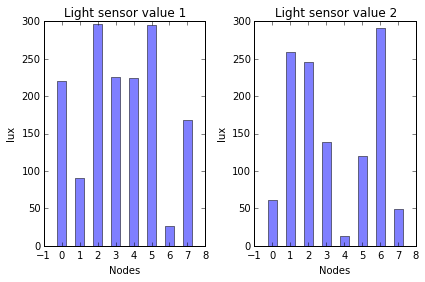

In [2]:
r = Resource.objects.filter(uri='/sensors/light', host__active=True)
print r
y = []
y2 = []
for light in r:
    resp= light.GET()
    v = resp.content
    print light, v
    y.append(int(v.split(';')[0]))
    y2.append(int(v.split(';')[1]))

#plot everything
x = np.arange(len(r))
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].bar(x, y, align="center", width=0.5, alpha=0.5)
axes[0].set_xlabel('Nodes')
axes[0].set_ylabel('lux')
axes[0].set_ylim(0, 300)
axes[0].set_title('Light sensor value 1')

axes[1].bar(x, y2, align="center", width=0.5, alpha=0.5)
axes[1].set_xlabel('Nodes')
axes[1].set_ylabel('lux')
axes[1].set_ylim(0, 300)
axes[1].set_title('Light sensor value 2')

fig.tight_layout()

### Dynamic RPL DAG visualizazion

Searching parents for resource:  aaaa::212:7402:2:202 - /rplinfo/parents
{"eui":"0212740100010101","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:7405:5:505 - /rplinfo/parents
{"eui":"0212740600060606","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:740b:b:b0b - /rplinfo/parents
{"eui":"0212740500050505","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:7408:8:808 - /rplinfo/parents
{"eui":"0212740200020202","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:740a:a:a0a - /rplinfo/parents
{"eui":"0212740500050505","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:7409:9:909 - /rplinfo/parents
{"eui":"0212740800080808","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:7406:6:606 - /rplinfo/parents
{"eui":"0212740100010101","pref":true,"etx":256}
Searching parents for resource:  aaaa::212:740c:c:c0c - /rplinfo/parents
{"eui":"0212740b000b0b0b","pref":true,"etx":256}


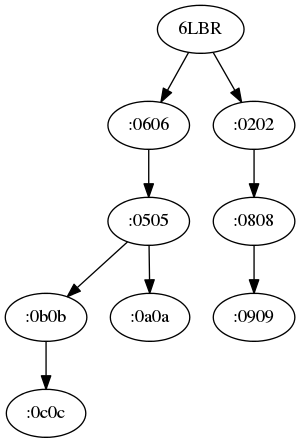

In [3]:
n = Network.objects.get(hostname='cooja@pyot')

g = DAGupdate(n)
pngShow(g.getPNG())